<a href="https://colab.research.google.com/github/schase15/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Steven_Chase_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np

In [0]:
a = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

# Mean
def mean(data):
  mean = sum(data) / len(data)
  return mean

In [0]:
mean(a)

3052.714285714286

In [0]:
# Variance
def variance(data):
  mean = sum(data) / len(data)
  variance = sum((x-mean)**2 for x in data)/ (len(data)-1)
  return variance

In [0]:
variance(a)

214387.90476190473

In [0]:
# Standard deviation
def std_dev(data):
    mean = sum(data) / len(data)
    variance = sum((x-mean)**2 for x in data)/ (len(data)-1)
    std_dev = variance**.5
    return std_dev

In [0]:
std_dev(a)

463.0204150595357

In [0]:
# Function to return all three
def mean_variance_std_dev(data):
    mean = sum(data) / len(data)
    variance = sum((x-mean)**2 for x in data)/ (len(data)-1)
    std_dev = variance**.5
    return [print('Mean is:', mean),
    print('Variance is:', variance),
    print('Standard Deviation is:', std_dev)]

In [0]:
mean_variance_std_dev(a)

Mean is: 3052.714285714286
Variance is: 214387.90476190473
Standard Deviation is: 463.0204150595357


[None, None, None]

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# a = last weeks sales
# b = number of customers that entered the store last week

b= np.array([127, 80, 105, 92, 120, 115, 93])

# Put sales and customer count from last week into a dataframe
df = pd.DataFrame({'a': a, 'b': b})

# Calculate covariance
df.cov()

,a,b
a,214387.904762,7604.357143
b,7604.357143,290.952381


Covariance between last week's sales and the number of customers that entered the store is 7604.357143.

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# Standard deviation of customer count using my function from above
std_dev(b)

17.057326313123664

In [0]:
# Standard deviation of sales = 463.0204150595357
# Standard deviation of customer counts = 17.057326313123664

# Correlation coefficient = covariance / (standard deviation a * standard deviation b)

correlation_coefficient = 7604.357143 / (463.0204150595357* 17.057326313123664)
correlation_coefficient

0.962833977832979

In [0]:
# Test
df.corr()

,a,b
a,1.000000,0.962834
b,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# Use only the numeric data columns
df_numeric = df.describe()
df_numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000


In [0]:
# Covariance
df_numeric.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,222619.376618,113670.521981,113673.587336,119807.261430,114254.391568,114310.068252,156045.054776,38593.360607,113724.553240
pclass,113670.521981,213479.005246,213764.623141,209113.551610,213586.310279,213593.107238,198533.337197,-5144.607848,213956.454425
survived,113673.587336,213764.623141,214051.238200,209385.622396,213872.545845,213879.319262,198786.918274,-5186.507839,214243.352198
age,119807.261430,209113.551610,209385.622396,205347.697720,209258.916720,209272.403823,197951.951491,-2909.785382,209573.076047
sibsp,114254.391568,213586.310279,213872.545845,209258.916720,213699.848343,213707.645604,199035.510455,-5011.315096,214064.682635
parch,114310.068252,213593.107238,213879.319262,209272.403823,213707.645604,213715.733360,199112.531235,-4999.933352,214071.602009
fare,156045.054776,198533.337197,198786.918274,197951.951491,199035.510455,199112.531235,214095.419689,7966.671642,198975.927540
body,38593.360607,-5144.607848,-5186.507839,-2909.785382,-5011.315096,-4999.933352,7966.671642,10702.064223,-5205.560294
has_cabin_number,113724.553240,213956.454425,214243.352198,209573.076047,214064.682635,214071.602009,198975.927540,-5205.560294,214435.755182


In [0]:
# Correlation
df_numeric.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.521421,0.520738,0.560347,0.523829,0.524065,0.714768,0.790674,0.520504
pclass,0.521421,1.000000,0.999999,0.998757,0.999986,0.999980,0.928650,-0.107632,0.999998
survived,0.520738,0.999999,1.000000,0.998718,0.999986,0.999981,0.928593,-0.108363,1.000000
age,0.560347,0.998757,0.998718,1.000000,0.998934,0.998962,0.944085,-0.062070,0.998716
sibsp,0.523829,0.999986,0.999986,0.998934,1.000000,0.999999,0.930518,-0.104789,0.999987
parch,0.524065,0.999980,0.999981,0.998962,0.999999,1.000000,0.930843,-0.104547,0.999982
fare,0.714768,0.928650,0.928593,0.944085,0.930518,0.930843,1.000000,0.166433,0.928642
body,0.790674,-0.107632,-0.108363,-0.062070,-0.104789,-0.104547,0.166433,1.000000,-0.108664
has_cabin_number,0.520504,0.999998,1.000000,0.998716,0.999987,0.999982,0.928642,-0.108664,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

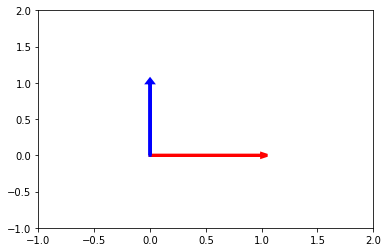

In [0]:
# Vectors
c= [1,0]
d= [0,1]

# Plot Vectors
plt.arrow(0, 0, c[0], c[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, d[0], d[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

# Change x and y axis to view better
plt.xlim(-1,2)
plt.ylim(-1,2)


plt.show()

Orthogonal means perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# Dot product will equal 0 if they are orthogonal
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.vdot(a,b)

-40

No they are not orthogonal becuase their dot product does not equal 0.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [60]:
# Vector
c = np.array([2, -15, 6, 20])

# First question
(np.linalg.norm(c))**2

665.0

In [61]:
# Second question
np.dot(c,c)

665

In [64]:
# Third question
c_t = c.T
print(c_t)

# Transpose of vector is itself. 
np.dot(c_t, c)

[  2 -15   6  20]


665

They all return the same value of 665. 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [72]:
# Vector
f = np.array([4,12,11,9,2])

# Convert into a unit vector by dividing by its norm
norm = np.linalg.norm(f)
np.multiply((1/norm), f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

 \begin{align}
 \hat{f} = \begin{bmatrix} \ 0.20908335 \\ 0.62725005 \\  0.57497921 \\ 0.47043754 \\ 0.10454167 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

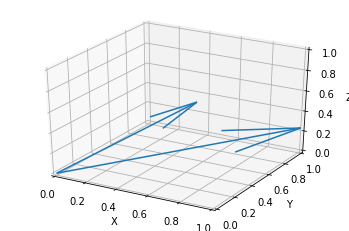

In [76]:
# 3-D Linearly dependent
from mpl_toolkits.mplot3d import Axes3D

vector_1 = np.array([1.2, .6, .5])
vector_2 = np.array([0.5, 0.7, .5])

# Plot
fig= plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.quiver(0,0,0,vector_1[0],vector_1[1],vector_1[2], length= 1)
ax.quiver(0,0,0,vector_2[0],vector_2[1],vector_2[2], length= 1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

These two vectors are dependent on the z dimension. 

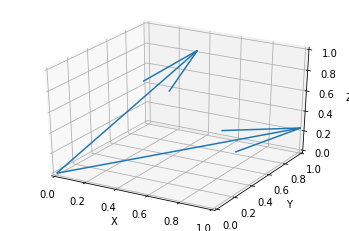

In [74]:
# 3-D Linearly independent

vector_1 = np.array([1.2, .6, .5])
vector_2 = np.array([0.5, 0.7, 1.0])

# Plot
fig= plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.quiver(0,0,0,vector_1[0],vector_1[1],vector_1[2], length= 1)
ax.quiver(0,0,0,vector_2[0],vector_2[1],vector_2[2], length= 1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

These three vectors are independent on all three dimensions x,y and z.

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

These two vectors span 1 dimensional space. h is just g multiplied by scalar 4. Therefore h (or g) is redundent, allowing these two vectors to only span 1 dimension.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [81]:
# Compose matrix

a = np.array([[1,2,3,],
            [-1,0,7],
            [4,8,2]])
np.linalg.matrix_rank(a)

3

Since the rank of the composite matrix is 3, that means that all three of these vectors are linearly independent. That means that the span of {l, m, n} is 3 dimensional. 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



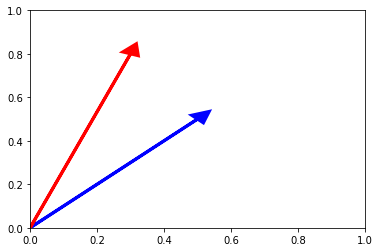

In [77]:
# To form a basis for R^2, plot two linearly independant 2d vectors

# Vectors
a = [.5, .5]
b = [.3, .8]

# Plot
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

## 6.2 What does it mean to form a basis?

The two vectors above create a 2 dimension basis because they are linearly independent. If you were to multiply these vectors by an infinite variety of scalars, the set of resultant vectors would fill the space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [82]:
# Matrix
P = np.array([[1,2,3,],
            [-1,0,7],
            [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us how many independent vectors there are in the matrix. This also tells us the dimension of the basis it forms, or what dimension it spans. 


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

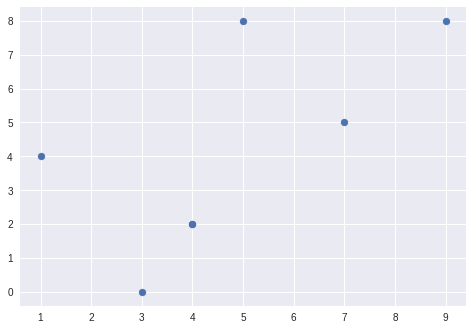

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

# Linear Projections - Stretch

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [100]:
# Calculate c
# c = (w dot v / v dot v)

c = (np.dot(w,v) / np.dot(v,v))
c

0.5

$proj_{L}(w)$ = cv

In [103]:
# Projection by w on L
np.multiply(c,v)

array([0.5, 1.5])

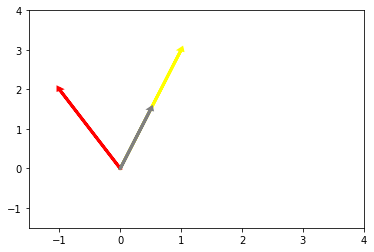

In [104]:
# Vectors
v = np.array([1,3])
w = np.array([-1,2])

# Projection of vector w on line v
proj = np.multiply(c,v)

# Plot
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')

# Set axis
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 4)

plt.show()